In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from statannot import add_stat_annotation



In [72]:
df = pd.read_excel('/Users/shouyuling/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Postdoc/Projects/Gensight/Data/TumblerTask/Results/BehavResults_AllSub.xlsx')
df.tail(10)

,Subjid,Task,Block,Trial,GogglesCondition,TrialType,Answer,Accuracy,Correct,ConfRating
550,P4006,Tumbler,6,1,GogglesON,Present,Present,100,Correct,3.0
551,P4006,Tumbler,6,2,GogglesON,Present,Present,100,Correct,3.0
552,P4006,Tumbler,6,3,GogglesON,Absent,Present,0,Incorrect,4.0
553,P4006,Tumbler,6,4,GogglesON,Present,Present,100,Correct,2.0
554,P4006,Tumbler,6,5,GogglesON,Absent,Present,0,Incorrect,4.0
555,P4006,Tumbler,6,6,GogglesON,Absent,Present,0,Incorrect,2.0
556,P4006,Tumbler,6,7,GogglesON,Absent,Present,0,Incorrect,3.0
557,P4006,Tumbler,6,8,GogglesON,Absent,Present,0,Incorrect,3.0
558,P4006,Tumbler,6,9,GogglesON,Present,Present,100,Correct,3.0
559,P4006,Tumbler,6,10,GogglesON,Present,Absent,0,Incorrect,2.0


In [73]:
data = df[['Subjid','GogglesCondition','Accuracy']].groupby(['Subjid','GogglesCondition']).mean().reset_index()
data

,Subjid,GogglesCondition,Accuracy
0,P1001,GogglesOFF,50.000000
1,P1001,GogglesON,97.500000
2,P1002,GogglesOFF,50.000000
3,P1002,GogglesON,71.250000
4,P1004,GogglesOFF,52.500000
5,P1004,GogglesON,80.000000
6,P4006,GogglesOFF,50.000000
7,P4006,GogglesON,50.000000
8,P4010,GogglesOFF,53.333333
9,P4010,GogglesON,60.000000


In [74]:
data.groupby('GogglesCondition').std()

/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_94721/4141706222.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('GogglesCondition').std()


,Accuracy
GogglesCondition,
GogglesOFF,1.624466
GogglesON,18.320071


In [75]:
unique_subjects = data['Subjid'].unique()
unique_subjects

array(['P1001', 'P1002', 'P1004', 'P4006', 'P4010'], dtype=object)

p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
appr. sig: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

GogglesOFF v.s. GogglesON: t-test independent samples, P_val=1.840e-02 stat=-2.502e+00
One-sample t-test for GogglesON: t-statistic = 2.654710159983487, p-value = 0.028351165989834833
One-sample t-test for GogglesOFF: t-statistic = 1.605910137093938, p-value = 0.09178343002763771


/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


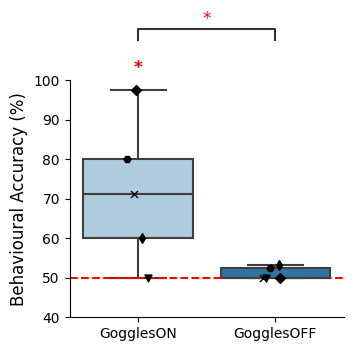

In [76]:
g = sns.catplot(data=data,kind='box',showfliers=False,
            y='Accuracy',x='GogglesCondition',order=['GogglesON','GogglesOFF'],
            #hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
            palette='Paired',
            height=4, aspect=.9)

unique_subjects = data['Subjid'].unique()
markers = ['D', 'x', 'H','v', 'd', 'p', 'h', 'H', '*', '+', 'x', 'd', '|', '_']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data[data['Subjid'] == subject],
        y='Accuracy', x='GogglesCondition', order=['GogglesON', 'GogglesOFF'],
        marker=marker, color='none', edgecolor='gray', linewidth=1, dodge=True
    )

# Define group pairs for statistical comparison
group_pairs = [
    (('GogglesON'), ('GogglesOFF'))
]

# Add statistical annotations
add_stat_annotation(
    g.ax, data=data, x='GogglesCondition', y='Accuracy',
    box_pairs=group_pairs, test='t-test_ind', text_format='star',
    loc='outside', verbose=2, comparisons_correction=None, 
    pvalue_thresholds=[(1, "ns"), (0.1, "appr. sig"), (0.05, "*"), (0.01, "**"), (0.001, "***")],
    stats_params={'alternative': 'less'},
    line_offset_to_box=0.2,  # Adjust this value to move the bar higher
    line_height=0.05,fontsize=12
)

for text in g.ax.texts:
    if any(star in text.get_text() for star in ['*', '**', '***']):
        text.set_color('red')

# Perform one-sample t-tests against the value 25 for each condition and annotate the plot
conditions = ['GogglesON', 'GogglesOFF']
for i, condition in enumerate(conditions):
    subset = data[data['GogglesCondition'] == condition]['Accuracy']
    t_stat, p_val = ttest_1samp(subset, 50, alternative='greater')
    
    # Determine significance level for annotation
    if p_val < 0.001:
        star = '***'
    elif p_val < 0.01:
        star = '**'
    elif p_val < 0.05:
        star = '*'
    else:
        star = ''
    
    # Print test result
    print(f"One-sample t-test for {condition}: t-statistic = {t_stat}, p-value = {p_val}")
    
    # Annotate the plot with the results
    g.ax.text(
        i, 102 - i * 2, f"{star}", horizontalalignment='center', color='red', fontsize=12, fontweight='bold'
    )


#g.map_dataframe(sns.stripplot,
#            y='Accuracy',x='GogglesCondition',order=['GogglesON','GogglesOFF'],
#            #hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
#            color='k',dodge=True)
g.set(ylim=[40,100])
#g.set(yticks=[15,20,25,30,35,40])
g.refline(y=50,color='red')
g.set_ylabels('Behavioural Accuracy (%)',fontsize=12)
g.set_xlabels('')
plt.show()

In [31]:
ttest_1samp(data[data['GogglesCondition']=='GogglesON']['Accuracy'],50)

TtestResult(statistic=2.654710159983487, pvalue=0.056702331979669666, df=4)

In [32]:
data = df[['Subjid','GogglesCondition','Correct','ConfRating']].groupby(['Subjid','GogglesCondition','Correct']).mean().reset_index()
data

,Subjid,GogglesCondition,Correct,ConfRating
0,P1001,GogglesOFF,Correct,1.100000
1,P1001,GogglesOFF,Incorrect,1.200000
2,P1001,GogglesON,Correct,4.538462
3,P1001,GogglesON,Incorrect,4.000000
4,P1002,GogglesOFF,Correct,1.000000
5,P1002,GogglesOFF,Incorrect,1.000000
6,P1002,GogglesON,Correct,1.719298
7,P1002,GogglesON,Incorrect,1.608696
8,P1004,GogglesOFF,Correct,1.000000
9,P1004,GogglesOFF,Incorrect,1.000000


/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1154: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_78493/1260211821.py:21: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)


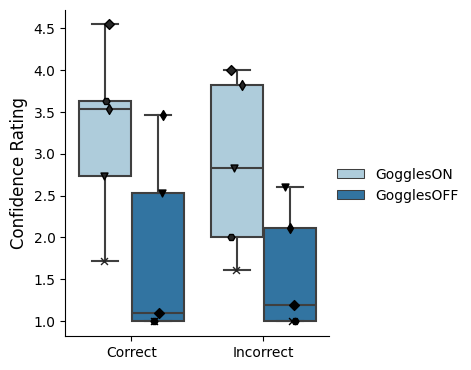

In [33]:
g = sns.catplot(data=data,kind='box',showfliers=False,
            y='ConfRating',x='Correct',
            hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
            palette='Paired',
            height=4, aspect=.9)

unique_subjects = data['Subjid'].unique()
markers = ['D', 'x', 'H','v', 'd', 'p', 'h', 'H', '*', '+', 'x', 'd', '|', '_']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data[data['Subjid'] == subject],
        y='ConfRating',x='Correct',
        hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
        marker=marker, color='none', edgecolor='gray', linewidth=1, dodge=True
    )
# Remove the additional legends created by stripplot
handles, labels = g.ax.get_legend_handles_labels()
unique_handles_labels = list(dict(zip(labels, handles)).items())  # Remove duplicates
g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)



#g.set(ylim=[40,100])
g.set_ylabels('Confidence Rating',fontsize=12)
g._legend.set_title('')
g.set_xlabels('')
plt.show()

In [34]:
ttest_ind(data[(data['GogglesCondition']=='GogglesON')&(data['Correct']=='Incorrect')]['ConfRating'],
          data[(data['GogglesCondition']=='GogglesOFF')&(data['Correct']=='Incorrect')]['ConfRating'])

TtestResult(statistic=2.1965676787625497, pvalue=0.0593105021590198, df=8.0)

In [35]:
ttest_rel(data[(data['GogglesCondition']=='GogglesON')]['ConfRating'],
          data[(data['GogglesCondition']=='GogglesOFF')]['ConfRating'])

TtestResult(statistic=3.456986277537356, pvalue=0.007194938158551566, df=9)

In [36]:
df = pd.read_excel('/Users/shouyuling/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Postdoc/Projects/Gensight/Data/TumblerTask/Results/AllSub_results.xlsx')
df.tail(10)

,Subjid,Task,Session,ElecGroup,FreqGroup,GogglesCondition,EyesCondition,Accuracy
14,1002,Tumbler,2,All_electrodes,1to40,GogglesON,EyesClosed,36.666667
15,1002,Tumbler,2,All_electrodes,1to40,GogglesOFF,EyesClosed,45.000000
16,1002,Tumbler,3,All_electrodes,1to40,GogglesON,EyesOpen,55.263158
17,1002,Tumbler,3,All_electrodes,1to40,GogglesOFF,EyesOpen,40.000000
18,1002,Tumbler,3,All_electrodes,1to40,GogglesON,EyesClosed,50.000000
19,1002,Tumbler,3,All_electrodes,1to40,GogglesOFF,EyesClosed,37.500000
20,1004,Tumbler,2,All_electrodes,1to40,GogglesON,EyesOpen,55.000000
21,1004,Tumbler,2,All_electrodes,1to40,GogglesOFF,EyesOpen,36.842105
22,1004,Tumbler,2,All_electrodes,1to40,GogglesON,EyesClosed,50.000000
23,1004,Tumbler,2,All_electrodes,1to40,GogglesOFF,EyesClosed,47.368421


In [37]:
data = df.groupby(['Subjid','ElecGroup','FreqGroup','GogglesCondition','EyesCondition']).mean().reset_index()
data

/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_78493/4216053411.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby(['Subjid','ElecGroup','FreqGroup','GogglesCondition','EyesCondition']).mean().reset_index()


,Subjid,ElecGroup,FreqGroup,GogglesCondition,EyesCondition,Session,Accuracy
0,1001,All_electrodes,1to40,GogglesOFF,EyesClosed,4.0,40.000000
1,1001,All_electrodes,1to40,GogglesOFF,EyesOpen,4.0,42.857143
2,1001,All_electrodes,1to40,GogglesON,EyesClosed,4.0,45.945946
3,1001,All_electrodes,1to40,GogglesON,EyesOpen,4.0,75.675676
4,1002,All_electrodes,1to40,GogglesOFF,EyesClosed,2.5,41.250000
5,1002,All_electrodes,1to40,GogglesOFF,EyesOpen,2.5,41.250000
6,1002,All_electrodes,1to40,GogglesON,EyesClosed,2.5,43.333333
7,1002,All_electrodes,1to40,GogglesON,EyesOpen,2.5,45.964912
8,1004,All_electrodes,1to40,GogglesOFF,EyesClosed,2.0,47.368421
9,1004,All_electrodes,1to40,GogglesOFF,EyesOpen,2.0,36.842105


In [38]:
data.groupby(['EyesCondition','GogglesCondition']).std()

/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_78493/3551828160.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['EyesCondition','GogglesCondition']).std()


Subjid   Session   Accuracy
EyesCondition GogglesCondition                                  
EyesClosed    GogglesOFF        1646.272395  1.095445   3.659706
              GogglesON         1646.272395  1.095445   7.570409
EyesOpen      GogglesOFF        1646.272395  1.095445   3.580378
              GogglesON         1646.272395  1.095445  13.771148

p-value annotation legend:
+: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

EyesOpen_GogglesOFF v.s. EyesOpen_GogglesON: t-test paired samples with Bonferroni correction, P_val=9.924e-02 stat=-2.139e+00
EyesClosed_GogglesOFF v.s. EyesClosed_GogglesON: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=3.016e-01


/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1154: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_78493/3844208918.py:23: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


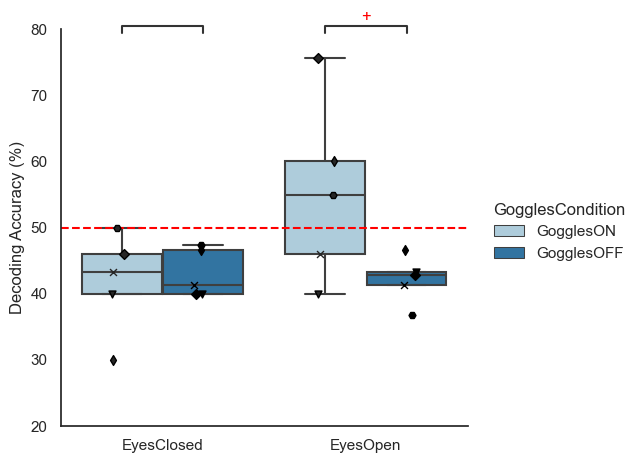

In [39]:
sns.set_theme(style="white",palette='Paired')

data2 = data[data['EyesCondition']=='EyesClosed']
g = sns.catplot(data=data,kind='box',showfliers=False,
            y='Accuracy',x='EyesCondition',
            hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF']
            )

unique_subjects = data['Subjid'].unique()
markers = ['D', 'x', 'H','v', 'd', 'p', 'h', 'H', '*', '+', 'x', 'd', '|', '_']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data[data['Subjid'] == subject],
        y='Accuracy',x='EyesCondition',
        hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
        marker=marker, color='none', edgecolor='gray', linewidth=1, dodge=True
    )
# Remove the additional legends created by stripplot
handles, labels = g.ax.get_legend_handles_labels()
unique_handles_labels = list(dict(zip(labels, handles)).items())  # Remove duplicates
g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Define pairs for statistical comparison
pairs = [
    (('EyesOpen', 'GogglesON'), ('EyesOpen', 'GogglesOFF')),
    (('EyesClosed', 'GogglesON'), ('EyesClosed', 'GogglesOFF')),
]

# Add statistical annotations using one-tailed t-tests
add_stat_annotation(
    g.ax, data=data, x='EyesCondition', y='Accuracy', hue='GogglesCondition',
    box_pairs=pairs,
    test='t-test_paired', text_format='star', loc='outside', verbose=2,
    pvalue_thresholds=[(0.1,"+"), (0.05, "*"), (0.01, "**"), (0.001, "***")],
    stats_params={'alternative': 'less'}
)

for text in g.ax.texts:
    if any(star in text.get_text() for star in ['+','*','**','(***)']):
        text.set_color('red')
        text.set_fontsize(12)

g.set(ylim=[20,80])
g.refline(y=50,color='red')
g.set(xlabel='')
g.set_ylabels('Decoding Accuracy (%)',fontsize=12)
plt.show()

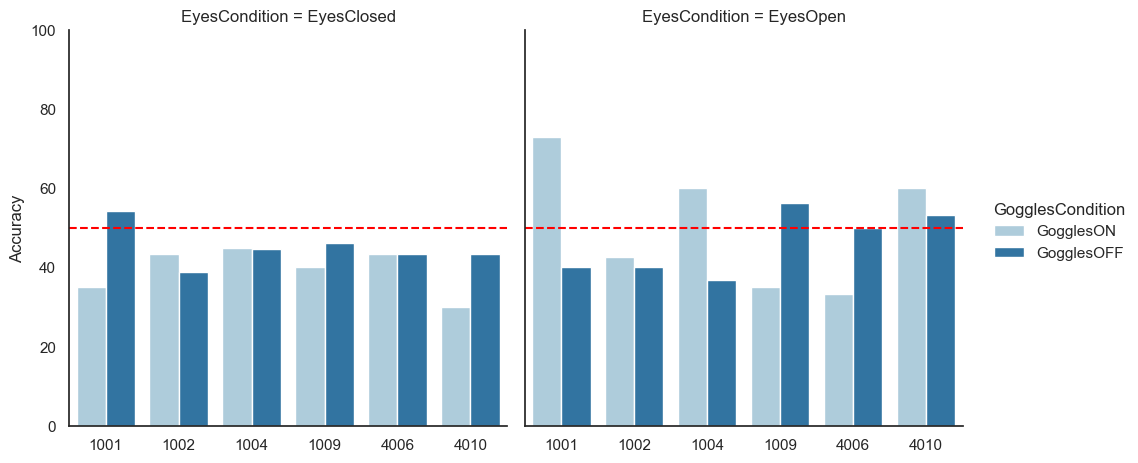

In [26]:
sns.set_theme(style="white",palette='Paired')

data2 = data[data['EyesCondition']=='EyesClosed']
g = sns.catplot(data=data,kind='bar',
            y='Accuracy',col='EyesCondition',x='Subjid',
            hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
            errorbar=None)
g.set(ylim=[0,100])
g.refline(y=50,color='red')
g.set(xlabel='')


## calculate d' of behavioural performance

In [1]:
import pandas as pd
from scipy.stats import norm

In [14]:
data = pd.read_excel('/Users/shouyuling/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Postdoc/Projects/Gensight/Data/TumblerTask/Results/BehavResults_AllSub.xlsx')
data.head()

,Subjid,Task,Block,Trial,GogglesCondition,TrialType,Answer,Accuracy,Correct,ConfRating
0,P4006,Tumbler,1,1,GogglesON,Present,Present,100,Correct,3.0
1,P4006,Tumbler,1,2,GogglesON,Absent,Present,0,Incorrect,4.0
2,P4006,Tumbler,1,3,GogglesON,Present,Absent,0,Incorrect,2.0
3,P4006,Tumbler,1,4,GogglesON,Absent,Present,0,Incorrect,3.0
4,P4006,Tumbler,1,5,GogglesON,Present,Present,100,Correct,3.0


In [15]:
results = []

# Group data by subject and condition
for (subj_id, condition), group in data.groupby(['Subjid', 'GogglesCondition']):
    # Calculate hit rate: True Positives / All "Present" trials
    present_trials = group[group['TrialType'] == 'Present']
    hits = (present_trials['Answer'] == 'Present').sum()
    hit_rate = hits / len(present_trials) if len(present_trials) > 0 else 0

    # Calculate false alarm rate: False Positives / All "Absent" trials
    absent_trials = group[group['TrialType'] == 'Absent']
    false_alarms = (absent_trials['Answer'] == 'Present').sum()
    false_alarm_rate = false_alarms / len(absent_trials) if len(absent_trials) > 0 else 0

    # Cap hit rate and false alarm rate to avoid infinite z-scores
    hit_rate = min(max(hit_rate, 1e-5), 1 - 1e-5)
    false_alarm_rate = min(max(false_alarm_rate, 1e-5), 1 - 1e-5)

    # Calculate d' using the inverse cumulative distribution function (z-score)
    d_prime = norm.ppf(hit_rate) - norm.ppf(false_alarm_rate)
    
    # Store the results
    results.append({
        'Subjid': subj_id,
        'GogglesCondition': condition,
        'Hit Rate': hit_rate,
        'False Alarm Rate': false_alarm_rate,
        'd_prime': d_prime
    })

# Convert results to a DataFrame
d_prime_df = pd.DataFrame(results)

# Display or save the results
print(d_prime_df)
# Optionally, save to a CSV file


  Subjid GogglesCondition  Hit Rate  False Alarm Rate   d_prime
0  P1001       GogglesOFF  0.000010          0.000010  0.000000
1  P1001        GogglesON  0.999990          0.050000  5.909744
2  P1002       GogglesOFF  0.000010          0.000010  0.000000
3  P1002        GogglesON  0.925000          0.500000  1.439531
4  P1004       GogglesOFF  0.750000          0.700000  0.150089
5  P1004        GogglesON  0.950000          0.350000  2.030174
6  P4006       GogglesOFF  0.600000          0.600000  0.000000
7  P4006        GogglesON  0.800000          0.800000  0.000000
8  P4010       GogglesOFF  0.500000          0.433333  0.167894
9  P4010        GogglesON  0.666667          0.466667  0.514379


p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
appr. sig: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

GogglesOFF v.s. GogglesON: t-test paired samples, P_val=7.201e-02 stat=-1.813e+00


/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)


<Figure size 640x480 with 0 Axes>

<Figure size 360x400 with 0 Axes>

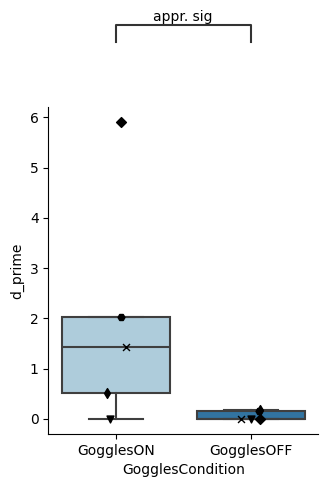

In [25]:
plt.clf()
data = d_prime_df
g = sns.catplot(data=data,kind='box',showfliers=False,
            y='d_prime',x='GogglesCondition',order=['GogglesON','GogglesOFF'],
            #hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
            palette='Paired',
            height=4, aspect=.9)

unique_subjects = data['Subjid'].unique()
markers = ['D', 'x', 'H','v', 'd', 'p', 'h', 'H', '*', '+', 'x', 'd', '|', '_']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data[data['Subjid'] == subject],
        y='d_prime', x='GogglesCondition', order=['GogglesON', 'GogglesOFF'],
        marker=marker, color='none', edgecolor='gray', linewidth=1, dodge=True
    )

# Define group pairs for statistical comparison
group_pairs = [
    (('GogglesON'), ('GogglesOFF'))
]

# Add statistical annotations
add_stat_annotation(
    g.ax, data=data, x='GogglesCondition', y='d_prime',
    box_pairs=group_pairs, test='t-test_paired', text_format='star',
    loc='outside', verbose=2, comparisons_correction=None, 
    pvalue_thresholds=[(1, "ns"), (0.1, "appr. sig"), (0.05, "*"), (0.01, "**"), (0.001, "***")],
    stats_params={'alternative': 'less'},
    line_offset_to_box=0.2,  # Adjust this value to move the bar higher
    line_height=0.05 
)

for text in g.ax.texts:
    if any(star in text.get_text() for star in ['*', '**', '***']):
        text.set_color('red')

plt.show()

# Plot results with BCP data

In [69]:
df = pd.read_excel('/Users/shouyuling/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Postdoc/Projects/Gensight/Data/TumblerTask/Results/BehavResults_AllSub_withBCP.xlsx')
df.head()

,Subjid,Task,Block,Trial,SubjectType,GogglesCondition,TrialType,Answer,Accuracy,Correct,ConfRating
0,P4006,Tumbler,1,1,GenSight Patient,GogglesON,Present,Present,100,Correct,3.0
1,P4006,Tumbler,1,2,GenSight Patient,GogglesON,Absent,Present,0,Incorrect,4.0
2,P4006,Tumbler,1,3,GenSight Patient,GogglesON,Present,Absent,0,Incorrect,2.0
3,P4006,Tumbler,1,4,GenSight Patient,GogglesON,Absent,Present,0,Incorrect,3.0
4,P4006,Tumbler,1,5,GenSight Patient,GogglesON,Present,Present,100,Correct,3.0


In [70]:
data = df[['Subjid','GogglesCondition','Accuracy','SubjectType']].groupby(['Subjid','SubjectType','GogglesCondition']).mean().reset_index()
data

,Subjid,SubjectType,GogglesCondition,Accuracy
0,P1001,GenSight Patient,GogglesOFF,50.000000
1,P1001,GenSight Patient,GogglesON,97.500000
2,P1002,GenSight Patient,GogglesOFF,50.000000
3,P1002,GenSight Patient,GogglesON,71.250000
4,P1004,GenSight Patient,GogglesOFF,52.500000
5,P1004,GenSight Patient,GogglesON,80.000000
6,P1009,Blind Control,GogglesOFF,70.000000
7,P1009,Blind Control,GogglesON,50.000000
8,P4006,GenSight Patient,GogglesOFF,50.000000
9,P4006,GenSight Patient,GogglesON,50.000000


p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
appr. sig: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

GogglesOFF v.s. GogglesON: t-test independent samples, P_val=1.840e-02 stat=-2.502e+00
One-sample t-test for GogglesON: t-statistic = 2.38217628076903, p-value = 0.03149745811002682
One-sample t-test for GogglesOFF: t-statistic = 1.5412869982127682, p-value = 0.08709093291351454


/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


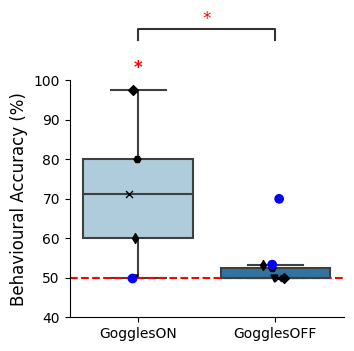

In [71]:
data2 = data[data['SubjectType'] == 'GenSight Patient']
g = sns.catplot(data=data2,kind='box',showfliers=False,
            y='Accuracy',x='GogglesCondition',order=['GogglesON','GogglesOFF'],
            #hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
            palette='Paired',
            height=4, aspect=.9)

unique_subjects = data2['Subjid'].unique()
markers = ['D', 'x', 'H','v', 'd', 'p', 'h', 'H', '*', '+', 'x', 'd', '|', '_']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data2[data2['Subjid'] == subject],
        y='Accuracy', x='GogglesCondition', order=['GogglesON', 'GogglesOFF'],
        marker=marker, color='none', edgecolor='gray', linewidth=1, dodge=True
    )

sns.stripplot(data=data[data['SubjectType']=='Blind Control'],
              y='Accuracy', x='GogglesCondition', order=['GogglesON', 'GogglesOFF'],
              color='blue', edgecolor='blue', linewidth=2, dodge=True)

# Define group pairs for statistical comparison
group_pairs = [
    (('GogglesON'), ('GogglesOFF'))
]

# Add statistical annotations
add_stat_annotation(
    g.ax, data=data2, x='GogglesCondition', y='Accuracy',
    box_pairs=group_pairs, test='t-test_ind', text_format='star',
    loc='outside', verbose=2, comparisons_correction=None, 
    pvalue_thresholds=[(1, "ns"), (0.1, "appr. sig"), (0.05, "*"), (0.01, "**"), (0.001, "***")],
    stats_params={'alternative': 'less'},
    line_offset_to_box=0.2,  # Adjust this value to move the bar higher
    line_height=0.05,
    fontsize = 12 
)

for text in g.ax.texts:
    if any(star in text.get_text() for star in ['*', '**', '***']):
        text.set_color('red')

# Perform one-sample t-tests against the value 25 for each condition and annotate the plot
conditions = ['GogglesON', 'GogglesOFF']
for i, condition in enumerate(conditions):
    subset = data[data['GogglesCondition'] == condition]['Accuracy']
    t_stat, p_val = ttest_1samp(subset, 50, alternative='greater')
    
    # Determine significance level for annotation
    if p_val < 0.001:
        star = '***'
    elif p_val < 0.01:
        star = '**'
    elif p_val < 0.05:
        star = '*'
    else:
        star = ''
    
    # Print test result
    print(f"One-sample t-test for {condition}: t-statistic = {t_stat}, p-value = {p_val}")
    
    # Annotate the plot with the results
    g.ax.text(
        i, 102 - i * 2, f"{star}", horizontalalignment='center', color='red', fontsize=12, fontweight='bold'
    )


#g.map_dataframe(sns.stripplot,
#            y='Accuracy',x='GogglesCondition',order=['GogglesON','GogglesOFF'],
#            #hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
#            color='k',dodge=True)
g.set(ylim=[40,100])
#g.set(yticks=[15,20,25,30,35,40])
g.refline(y=50,color='red')
g.set_ylabels('Behavioural Accuracy (%)',fontsize=12)
g.set_xlabels('')
plt.show()

In [48]:
data = df[['Subjid','SubjectType','GogglesCondition','Correct','ConfRating']].groupby(['Subjid','SubjectType','GogglesCondition','Correct']).mean().reset_index()
data

,Subjid,SubjectType,GogglesCondition,Correct,ConfRating
0,P1001,GenSight Patient,GogglesOFF,Correct,1.100000
1,P1001,GenSight Patient,GogglesOFF,Incorrect,1.200000
2,P1001,GenSight Patient,GogglesON,Correct,4.538462
3,P1001,GenSight Patient,GogglesON,Incorrect,4.000000
4,P1002,GenSight Patient,GogglesOFF,Correct,1.000000
5,P1002,GenSight Patient,GogglesOFF,Incorrect,1.000000
6,P1002,GenSight Patient,GogglesON,Correct,1.719298
7,P1002,GenSight Patient,GogglesON,Incorrect,1.608696
8,P1004,GenSight Patient,GogglesOFF,Correct,1.000000
9,P1004,GenSight Patient,GogglesOFF,Incorrect,1.000000


In [63]:
data[data['SubjectType']=='Blind Control']


,Subjid,SubjectType,GogglesCondition,Correct,ConfRating
12,P1009,Blind Control,GogglesOFF,Correct,1.0
13,P1009,Blind Control,GogglesOFF,Incorrect,1.0
14,P1009,Blind Control,GogglesON,Correct,1.0
15,P1009,Blind Control,GogglesON,Incorrect,1.0
24,P4012,Blind Control,GogglesOFF,Correct,1.0
25,P4012,Blind Control,GogglesOFF,Incorrect,1.0


/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1154: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_94721/526624270.py:27: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)


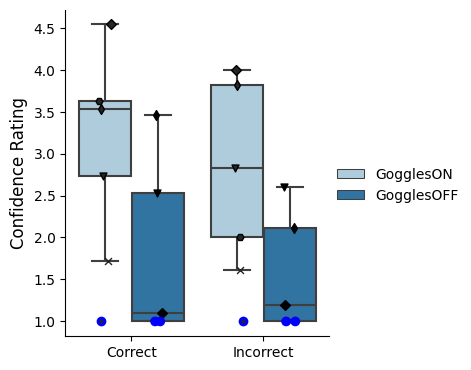

In [67]:
data2 = data[data['SubjectType']=='GenSight Patient']
g = sns.catplot(data=data2,kind='box',showfliers=False,
            y='ConfRating',x='Correct',
            hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
            palette='Paired',
            height=4, aspect=.9)

unique_subjects = data2['Subjid'].unique()
markers = ['D', 'x', 'H','v', 'd', 'p', 'h', 'H', '*', '+', 'x', 'd', '|', '_']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data2[data2['Subjid'] == subject],
        y='ConfRating',x='Correct',
        hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
        marker=marker, color='none', edgecolor='gray', linewidth=1, dodge=True
    )

sns.stripplot(data=data[data['SubjectType']=='Blind Control'],
              y='ConfRating', x='Correct', hue='GogglesCondition',hue_order=['GogglesON', 'GogglesOFF'],
              color='blue', edgecolor='blue', linewidth=2, dodge=True)

# Remove the additional legends created by stripplot
handles, labels = g.ax.get_legend_handles_labels()
unique_handles_labels = list(dict(zip(labels, handles)).items())  # Remove duplicates
g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)



#g.set(ylim=[40,100])
g.set_ylabels('Confidence Rating',fontsize=12)
g._legend.set_title('')
g.set_xlabels('')
plt.show()

In [6]:
df = pd.read_excel('/Users/shouyuling/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Postdoc/Projects/Gensight/Data/TumblerTask/Results/AllSub_results_withBCP.xlsx')
df.tail(10)

,Subjid,SubjectType,Task,Session,ElecGroup,FreqGroup,GogglesCondition,EyesCondition,Accuracy
22,1002,GenSight Patient,Tumbler,2,All_electrodes,1to40,GogglesON,EyesClosed,36.666667
23,1002,GenSight Patient,Tumbler,2,All_electrodes,1to40,GogglesOFF,EyesClosed,45.000000
24,1002,GenSight Patient,Tumbler,3,All_electrodes,1to40,GogglesON,EyesOpen,55.263158
25,1002,GenSight Patient,Tumbler,3,All_electrodes,1to40,GogglesOFF,EyesOpen,40.000000
26,1002,GenSight Patient,Tumbler,3,All_electrodes,1to40,GogglesON,EyesClosed,50.000000
27,1002,GenSight Patient,Tumbler,3,All_electrodes,1to40,GogglesOFF,EyesClosed,37.500000
28,1004,GenSight Patient,Tumbler,2,All_electrodes,1to40,GogglesON,EyesOpen,55.000000
29,1004,GenSight Patient,Tumbler,2,All_electrodes,1to40,GogglesOFF,EyesOpen,36.842105
30,1004,GenSight Patient,Tumbler,2,All_electrodes,1to40,GogglesON,EyesClosed,50.000000
31,1004,GenSight Patient,Tumbler,2,All_electrodes,1to40,GogglesOFF,EyesClosed,47.368421


In [7]:
data = df.groupby(['Subjid','SubjectType','ElecGroup','FreqGroup','GogglesCondition','EyesCondition']).mean().reset_index()
data

/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_2342/1930096807.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby(['Subjid','SubjectType','ElecGroup','FreqGroup','GogglesCondition','EyesCondition']).mean().reset_index()


,Subjid,SubjectType,ElecGroup,FreqGroup,GogglesCondition,EyesCondition,Session,Accuracy
0,1001,GenSight Patient,All_electrodes,1to40,GogglesOFF,EyesClosed,4.0,40.000000
1,1001,GenSight Patient,All_electrodes,1to40,GogglesOFF,EyesOpen,4.0,42.857143
2,1001,GenSight Patient,All_electrodes,1to40,GogglesON,EyesClosed,4.0,45.945946
3,1001,GenSight Patient,All_electrodes,1to40,GogglesON,EyesOpen,4.0,75.675676
4,1002,GenSight Patient,All_electrodes,1to40,GogglesOFF,EyesClosed,2.5,41.250000
5,1002,GenSight Patient,All_electrodes,1to40,GogglesOFF,EyesOpen,2.5,41.250000
6,1002,GenSight Patient,All_electrodes,1to40,GogglesON,EyesClosed,2.5,43.333333
7,1002,GenSight Patient,All_electrodes,1to40,GogglesON,EyesOpen,2.5,45.964912
8,1004,GenSight Patient,All_electrodes,1to40,GogglesOFF,EyesClosed,2.0,47.368421
9,1004,GenSight Patient,All_electrodes,1to40,GogglesOFF,EyesOpen,2.0,36.842105


In [8]:
data.to_csv('~/Desktop/GenSight_Tumbler_decoding_results.csv')

/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1154: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_94721/1766304568.py:31: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


p-value annotation legend:
+: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

EyesOpen_GogglesOFF v.s. EyesOpen_GogglesON: t-test paired samples with Bonferroni correction, P_val=9.924e-02 stat=-2.139e+00
EyesClosed_GogglesOFF v.s. EyesClosed_GogglesON: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=3.016e-01


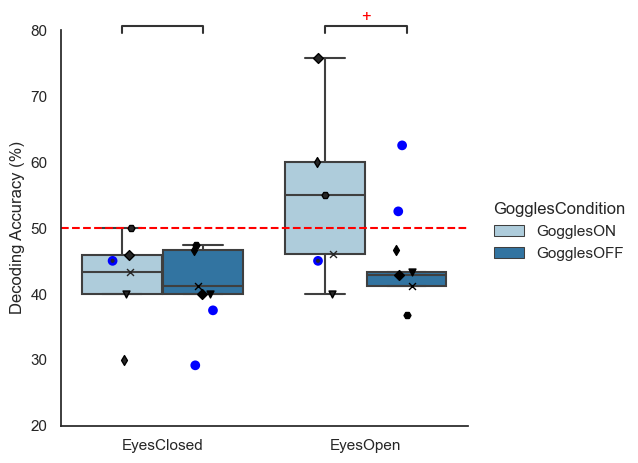

In [82]:
sns.set_theme(style="white",palette='Paired')

data2 = data[data['SubjectType']=='GenSight Patient']
g = sns.catplot(data=data2,kind='box',showfliers=False,
            y='Accuracy',x='EyesCondition',
            hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF']
            )

unique_subjects = data2['Subjid'].unique()
markers = ['D', 'x', 'H','v', 'd', 'p', 'h', 'H', '*', '+', 'x', 'd', '|', '_']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data2[data2['Subjid'] == subject],
        y='Accuracy',x='EyesCondition',
        hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
        marker=marker, color='none', edgecolor='gray', linewidth=1, dodge=True
    )

data3 = data[data['SubjectType']=='Blind Control']
sns.stripplot(data=data[data['SubjectType']=='Blind Control'],
            y='Accuracy',x='EyesCondition',
            hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
            color='blue', edgecolor='blue', linewidth=2, dodge=True)


# Remove the additional legends created by stripplot
handles, labels = g.ax.get_legend_handles_labels()
unique_handles_labels = list(dict(zip(labels, handles)).items())  # Remove duplicates
g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Define pairs for statistical comparison
pairs = [
    (('EyesOpen', 'GogglesON'), ('EyesOpen', 'GogglesOFF')),
    (('EyesClosed', 'GogglesON'), ('EyesClosed', 'GogglesOFF')),
]

# Add statistical annotations using one-tailed t-tests
add_stat_annotation(
    g.ax, data=data2, x='EyesCondition', y='Accuracy', hue='GogglesCondition',
    box_pairs=pairs,
    test='t-test_paired', text_format='star', loc='outside', verbose=2,
    pvalue_thresholds=[(0.1,"+"), (0.05, "*"), (0.01, "**"), (0.001, "***")],
    stats_params={'alternative': 'less'}
)

for text in g.ax.texts:
    if any(star in text.get_text() for star in ['+','*','**','(***)']):
        text.set_color('red')
        text.set_fontsize(12)

g.set(ylim=[20,80])
g.refline(y=50,color='red')
g.set(xlabel='')
g.set_ylabels('Decoding Accuracy (%)',fontsize=12)
plt.show()